In [179]:
import numpy as np
from numpy.linalg import cholesky
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

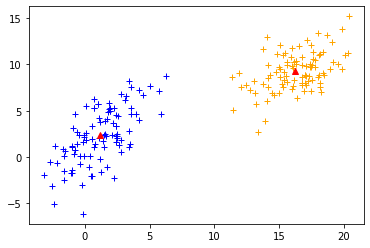

In [198]:
mean1 = [1,2]
conv1 = [[4,4],[4,9]]
mean2 = [16,9]
conv2 = [[4,2],[2,4]]

x1 = np.random.multivariate_normal(mean1,conv1,100)
x2 = np.random.multivariate_normal(mean2,conv2,100)

c1 = x1.mean(axis = 0)
c2 = x2.mean(axis = 0)

plt.plot(x1.T[0],x1.T[1],'+',color="b")
plt.plot(x2.T[0],x2.T[1],'+',color="orange")
plt.plot(c1[0],c1[1],'^',color="red")
plt.plot(c2[0],c2[1],'^',color="red")
plt.savefig('img/simple_2d.png')
plt.show()

In [209]:
# 高斯核函数
def rbf(x,z,sigma=5):
#     只支持两个向量rbf,不支持多个如：[x,x,x] [y,y,y]
    return np.exp(-((x-z)**2).sum()/ (2*sigma**2))
# 线性核
# def rbf(x,z):
# #     只支持两个向量rbf,不支持多个如：[x,x,x] [y,y,y]
# # a = np.array([1,2])
# # b = np.array([3,4])
# # rbf(a,b) = 11
#     return (x*z).sum()

m1 = x1.shape[0]
m2 = x2.shape[0]
b = 0
for i in range(m1):
    for j in range(m2):
        b += 1./(2*m1*m1) * rbf(x1[i],x1[j])  + 1./(2*m1*m2) * rbf(x2[i],x2[j])

In [211]:
def y(x,x1,x2,b):
    res = 0
    m1 = x1.shape[0]
    m2 = x2.shape[0]
    for i in range(m1):
        res += 1./m1 * rbf(x,x1[i])
    for i in range(m2):
        res -= 1./m2 * rbf(x,x2[i])
    return np.sign(res - b)


In [212]:
x1_test = np.random.multivariate_normal(mean1,conv1,50)
x2_test = np.random.multivariate_normal(mean2,conv2,50)

Accuracy:  0.75


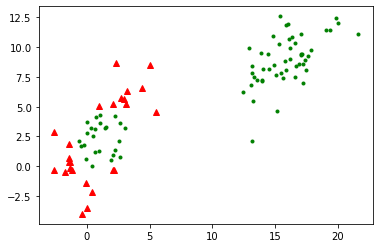

In [213]:
total = 0
fault = []
right = []

for i in range(x1_test.shape[0]):
    if y(x1_test[i],x1,x2,b) == 1:
        total += 1
        right.append(x1_test[i])
    else:
        fault.append(x1_test[i])
for i in range(x2_test.shape[0]):
    if y(x2_test[i],x1,x2,b) == -1:
        total += 1
        right.append(x2_test[i])
    else:
        fault.append(x2_test[i])

fault = np.array(fault).T
right = np.array(right).T
print("Accuracy: ",total / 100.0)
plt.plot(fault[0],fault[1],'^',color="red")
plt.plot(right[0],right[1],'.',color="green")
plt.savefig('img/simple_res2d.png')
plt.show()